# AT2020zso

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit
from glob import glob

z = 0.0563

___
## EFOSC2

In [2]:
efo_ascii = glob('../Files/*efo*/*err.asci') # 6 .ascii files
efo_ascii

['../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201116_Gr13_Free_slit1.0_59235_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201120_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201122_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201208_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201215_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20210510_Gr13_Free_slit1.0_59346_1_err.asci']

In [3]:
def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

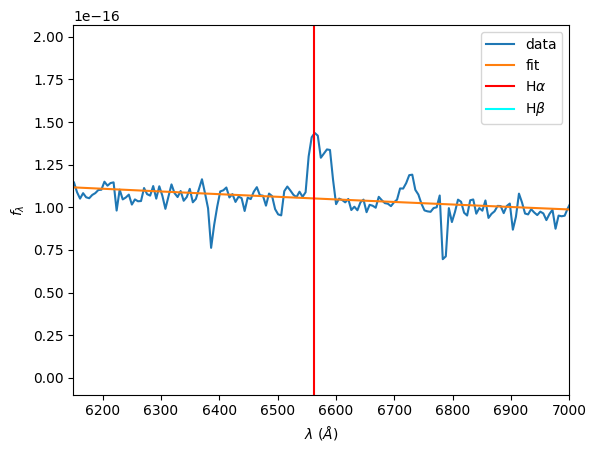

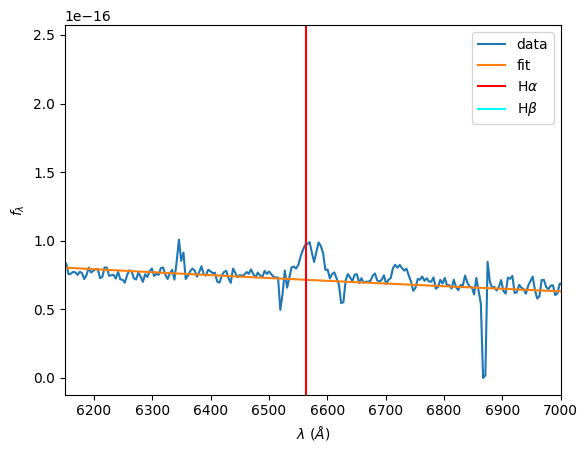

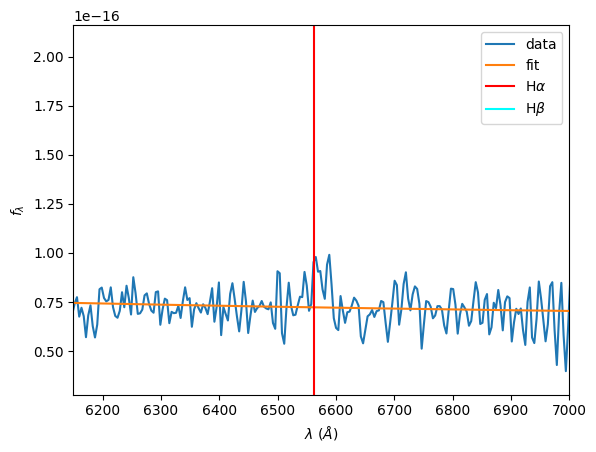

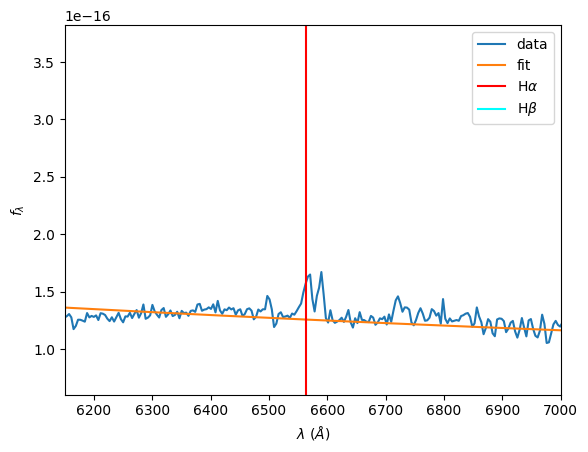

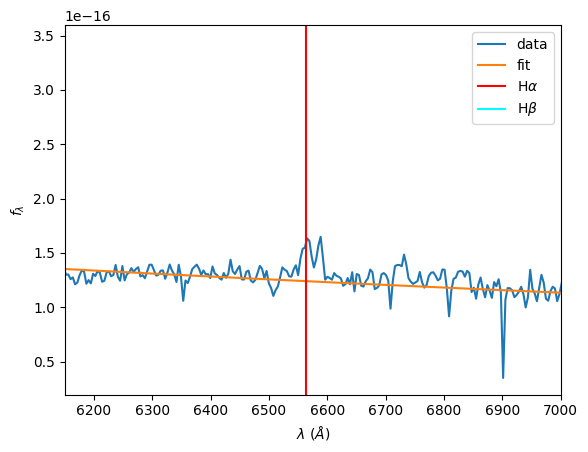

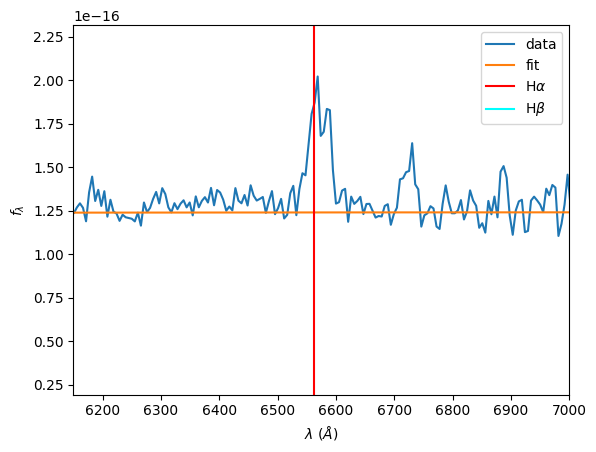

In [17]:
power_law_params = []

for file in efo_ascii:
    table = Table.read(file, format='ascii').to_pandas()
    wl = table['col1']
    flux = table['col2']

    continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
    power_law_params.append([*continuum[0]])

    plt.figure()
    plt.plot(wl/(1+z), flux, label='data')
    plt.plot(wl/(1+z), power_law(wl, *continuum[0]), label='fit')
    plt.axvline(6563, label=r'H$\alpha$', color='red')
    plt.axvline(4861, label=r'H$\beta$', color='cyan')
    plt.xlabel('$\lambda$ ($\AA$)')
    plt.ylabel('$f_{\lambda}$')
    plt.xlim(6150, 7000)
    plt.legend()
    plt.show()

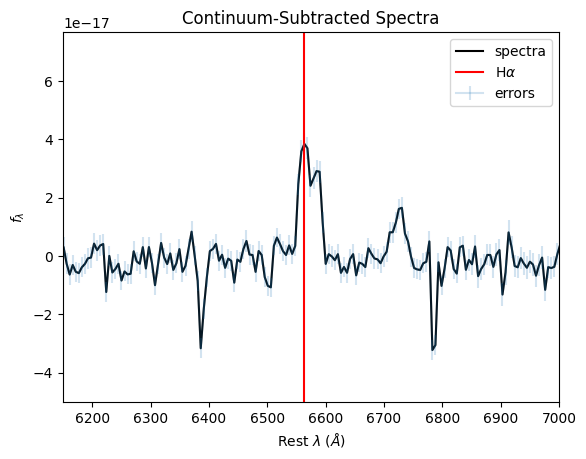

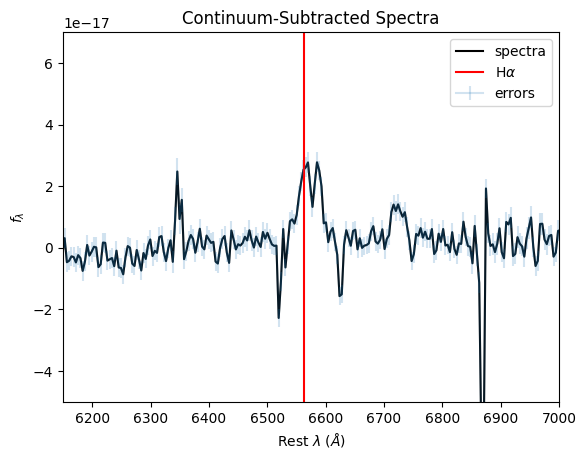

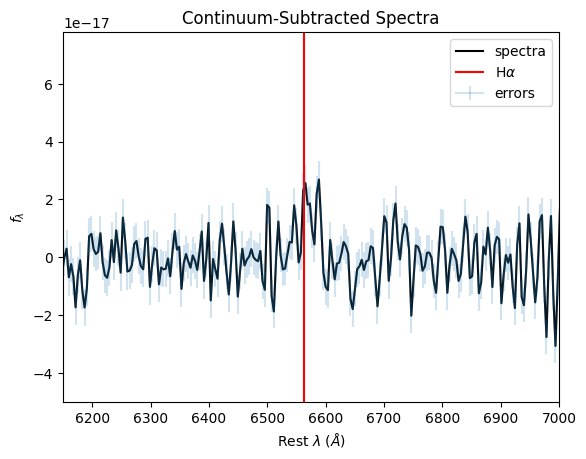

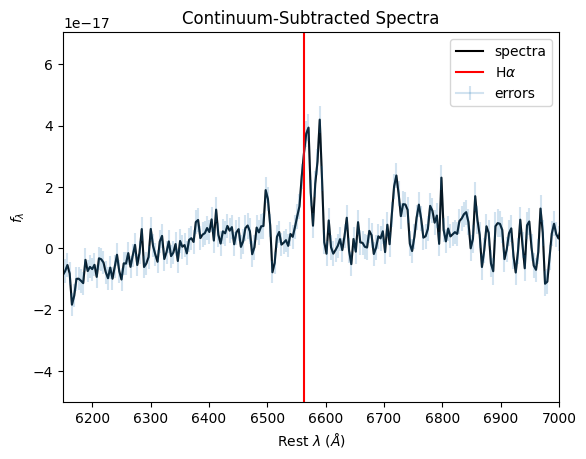

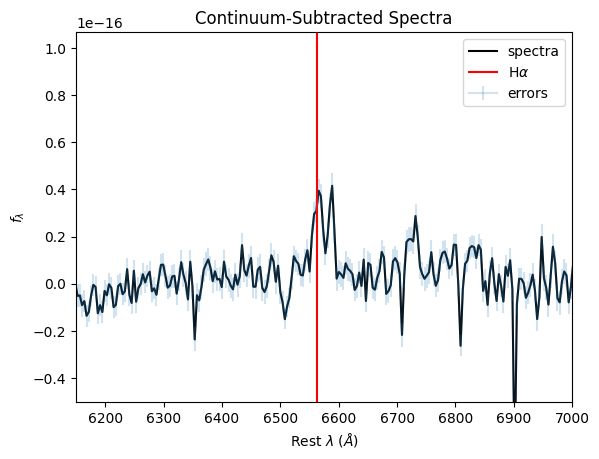

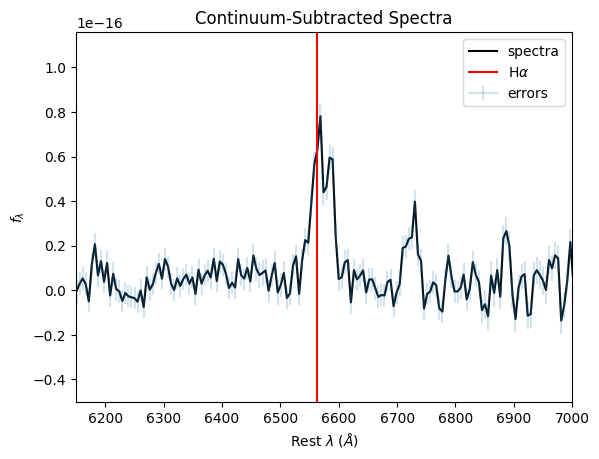

In [18]:
for i, file in enumerate(efo_ascii):
    table = Table.read(file, format='ascii').to_pandas()
    wl = table['col1']
    flux = table['col2']
    err = table['col3']

    plt.figure()
    plt.plot(wl/(1+z), flux - power_law(wl, *power_law_params[i]), color='black', label='spectra')
    plt.errorbar(wl/(1+z), flux - power_law(wl, *power_law_params[i]), yerr=err, alpha=0.2, label='errors')
    plt.axvline(6563, label=r'H$\alpha$', color='red')
    plt.title('Continuum-Subtracted Spectra')
    plt.xlabel('Rest $\lambda$ ($\AA$)')
    plt.ylabel('$f_{\lambda}$')
    plt.xlim(6150, 7000)
    plt.ylim(-0.5e-16, )
    plt.legend()
    plt.show()

In [6]:
selected = efo_ascii[3]
table1 = Table.read(selected, format='ascii').to_pandas()
wl1 = table1['col1']
flux1 = table1['col2']
error1 = table1['col3']

wl1_oth = np.argmin(np.abs(wl1 - 3500))
wl1_min = np.argmin(np.abs(wl1 - 4400))
wl1_max = np.argmin(np.abs(wl1 - 5200))
cut_range = np.append(np.arange(0, wl1_oth), np.arange(wl1_min, wl1_max))

wl1_cut = np.delete(wl1, cut_range)
flux1_cut = np.delete(flux1, cut_range)
error1_cut = np.delete(error1, cut_range)

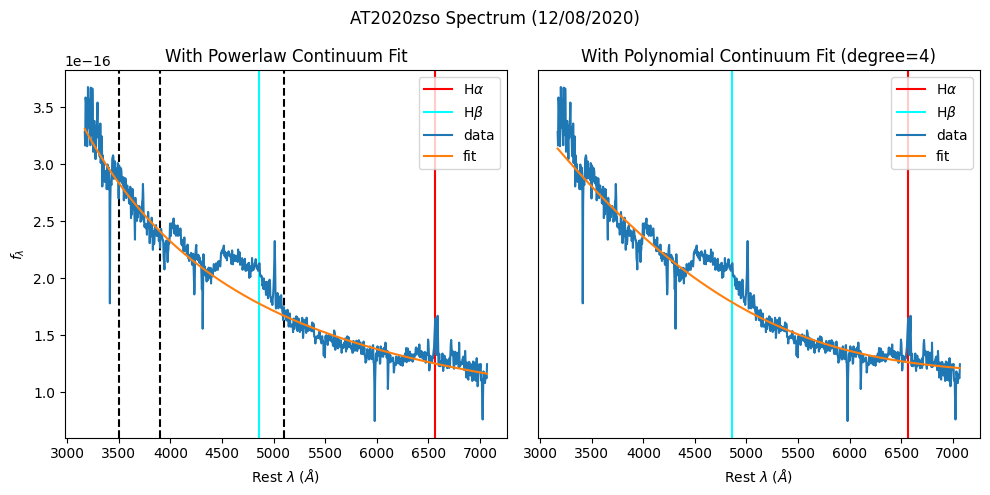

In [7]:
continuum1 = curve_fit(power_law, wl1_cut, flux1_cut,
                       sigma=error1_cut, absolute_sigma=True,
                       p0=power_law_params[3], maxfev=1000000)

p = np.polyfit(wl1_cut, flux1_cut, 4)
poly = np.poly1d(p)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axvline(6563, label=r'H$\alpha$', color='red'); plt.axvline(4861, label=r'H$\beta$', color='cyan')
plt.axvline(3500, c='black', linestyle='--'); plt.axvline(3900, c='black', linestyle='--'); plt.axvline(5100, c='black', linestyle='--')
plt.plot(wl1/(1+z), flux1, label='data'); plt.plot(wl1/(1+z), power_law(wl1, *continuum1[0]), label='fit')
plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.ylabel('$f_{\lambda}$')
plt.title('With Powerlaw Continuum Fit')
plt.legend(loc=1)

plt.subplot(1, 2, 2)
plt.axvline(6563, label=r'H$\alpha$', color='red'); plt.axvline(4861, label=r'H$\beta$', color='cyan')
plt.plot(wl1/(1+z), flux1, label='data'); plt.plot(wl1/(1+z), poly(wl1), label='fit')
plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.gca().yaxis.set_visible(False)
plt.title(f'With Polynomial Continuum Fit (degree={len(poly)})')
plt.legend(loc=1)

plt.suptitle('AT2020zso Spectrum (12/08/2020)')
plt.tight_layout(); plt.show()

In [8]:
#plt.xlim(5500, 7500)

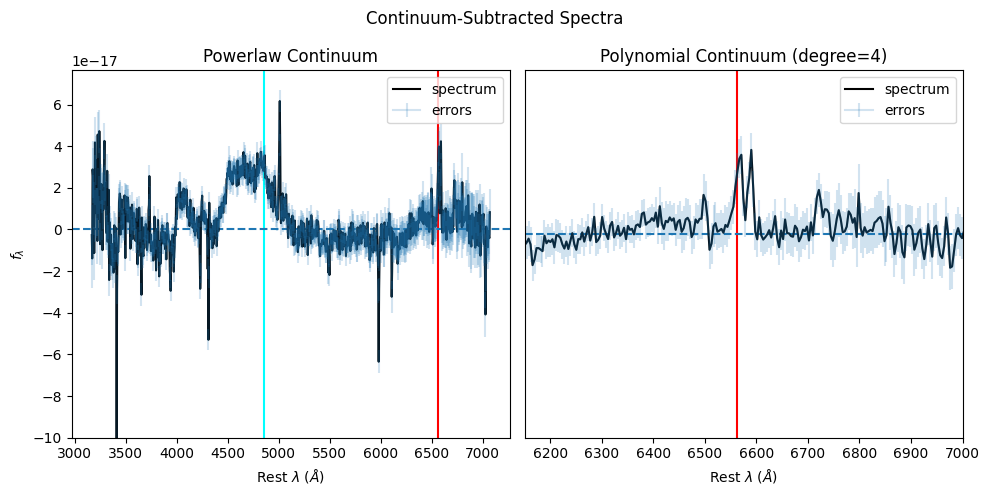

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axvline(6563, color='red'); plt.axvline(4861, color='cyan'); plt.axhline(0, linestyle='--')
plt.plot(wl1/(1+z), flux1 - power_law(wl1, *continuum1[0]), color='black', label='spectrum')
plt.errorbar(wl1/(1+z), flux1 - power_law(wl1, *continuum1[0]), yerr=err[:1011], alpha=0.2, label='errors')
plt.title('Powerlaw Continuum'); plt.ylim(-1e-16, )
plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.ylabel('$f_{\lambda}$')
plt.legend(loc=1)

plt.subplot(1, 2, 2)
plt.axvline(6563, color='red'); plt.axvline(4861, color='cyan'); plt.axhline(0, linestyle='--')
plt.plot(wl1/(1+z), flux1 - poly(wl1), color='black', label='spectrum')
plt.errorbar(wl1/(1+z), flux1 - poly(wl1), yerr=err[:1011], alpha=0.2, label='errors')
plt.title(f'Polynomial Continuum (degree={len(poly)})'); plt.ylim(-1e-16, )
plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.gca().yaxis.set_visible(False)
plt.xlim(6150, 7000)
plt.legend(loc=1)

plt.suptitle('Continuum-Subtracted Spectra')
plt.tight_layout(); plt.show()

___
## Nordic Optical Telescope (NOT)

In [10]:
not_ascii = glob('../Files/*not*/spec*.ascii') # 3 .ascii files
not_ascii

['../Files/at2020zso_not_charlotte/spec1d_ALDl170107-AT2020zso_ALFOSC_2020Dec17T193228.675.ascii',
 '../Files/at2020zso_not_charlotte/spec1d_ALDl170108-AT2020zso_ALFOSC_2020Dec17T194738.999.ascii',
 '../Files/at2020zso_not_charlotte/spec1d_ALDl170113-SP2317-054_ALFOSC_2020Dec17T200105.747.ascii']

In [11]:
#plt.xlim(6000, 7000)

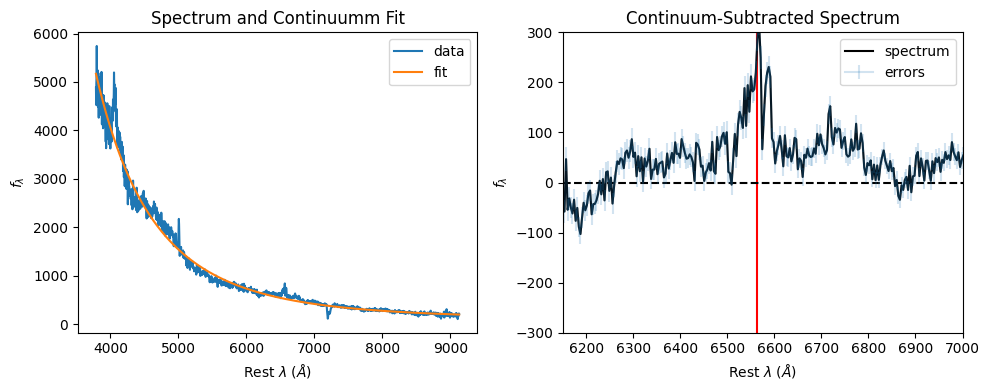

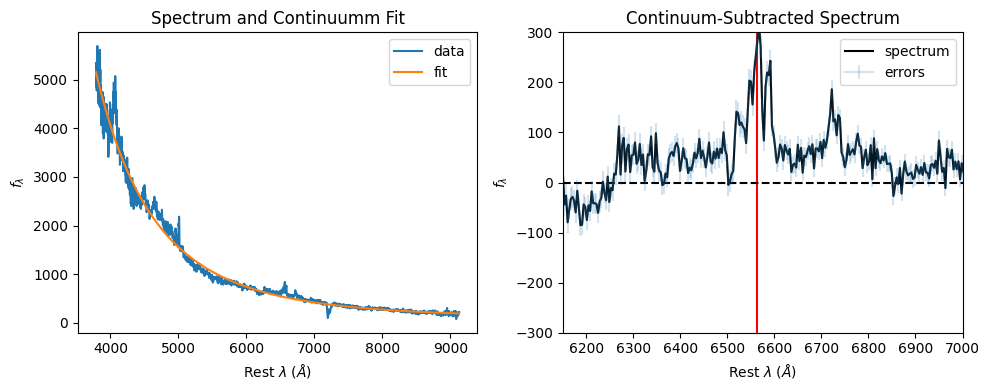

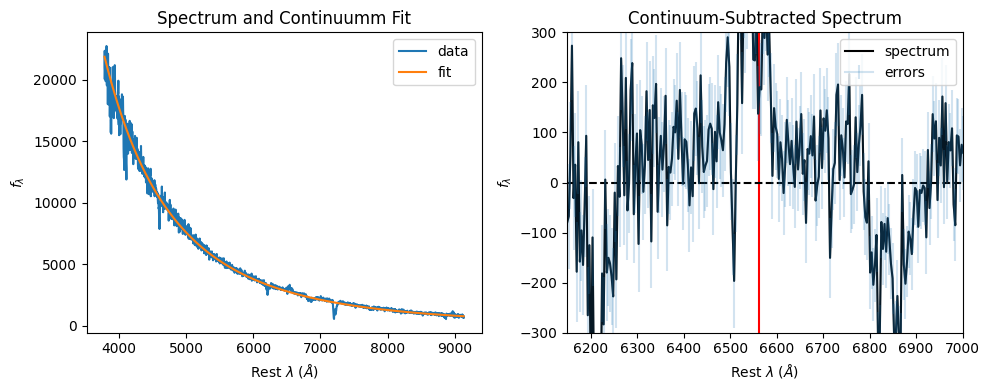

In [19]:
power_law_params_not = []

for file in not_ascii:
    table = Table.read(file, format='ascii').to_pandas()
    table.columns = ['col1', 'col2', 'col3']
    wl = table['col1']
    flux = table['col2']
    error = table['col3']

    continuum_not = curve_fit(power_law, wl, flux, sigma=error, absolute_sigma=True, p0=[1e6, -2, 1e-4], maxfev=10000)
    power_law_params_not.append([*continuum_not[0]])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(wl/(1+z), flux, label='data')
    plt.plot(wl/(1+z), power_law(wl, *continuum_not[0]), label='fit')
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.ylabel('$f_{\lambda}$')
    plt.title('Spectrum and Continuumm Fit'); plt.legend()

    plt.subplot(1, 2, 2)
    plt.axvline(6563, color='red'); plt.axvline(4861, color='cyan'); plt.axhline(0, color='black', linestyle='--')
    plt.plot(wl/(1+z), flux - power_law(wl, *continuum_not[0]), label='spectrum', color='black')
    plt.errorbar(wl/(1+z), flux - power_law(wl, *continuum_not[0]), yerr=error, alpha=0.2, label='errors')
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.ylabel('$f_{\lambda}$'); plt.ylim(-1000, 1000)
    plt.xlim(6150, 7000); plt.ylim(-300, 300)
    plt.title('Continuum-Subtracted Spectrum'); plt.legend()

    plt.tight_layout(); plt.show()